In [12]:
import numpy as np 
import os 
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [27]:
import sys

assert 'zipfile'in sys.modules
assert 'pandas'in sys.modules and pd
assert 'numpy'in sys.modules and np
assert 'matplotlib'in sys.modules and plt

In [31]:
import requests
from pathlib import Path
import time 

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path object representing the file.
    """
    
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok = True)
    file_path = data_dir / Path(file)
    # If the file already exists and we want to force a download then
    # delete the file first so that the creation date is correct.
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
        last_modified_time = time.ctime(file_path.stat().st_mtime)
    else:
        last_modified_time = time.ctime(file_path.stat().st_mtime)
        print("Using cached version that was downloaded (UTC):", last_modified_time)
    return file_path
    

def head(filename, lines=5):
    """
    Returns the first few lines of a file.
    
    filename: the name of the file to open
    lines: the number of lines to include
    
    return: A list of the first few lines from the file.
    """
    from itertools import islice
    with open(filename, "r") as f:
        return list(islice(f, lines))


In [32]:
source_data_url = 'http://www.ds100.org/sp19/assets/datasets/proj1-SFBusinesses.zip'
target_file_name = 'data.zip'

# Change the force=False -> force=True in case you need to force redownload the data
dest_path = fetch_and_cache(
    data_url=source_data_url, 
    data_dir='.', 
    file=target_file_name, 
    force=False)

Using cached version that was downloaded (UTC): Tue May 28 22:15:02 2019


In [34]:
my_zip = zipfile.ZipFile(file ="data.zip", mode='r')
list_names = my_zip.namelist()
list_names

['violations.csv', 'businesses.csv', 'inspections.csv', 'legend.csv']

In [35]:
list_of_files = my_zip.filelist
display(list_of_files)
for file in list_of_files:
    print (file.filename, file.file_size)

[<ZipInfo filename='violations.csv' compress_type=deflate external_attr=0x20 file_size=3726206 compress_size=286253>,
 <ZipInfo filename='businesses.csv' compress_type=deflate external_attr=0x20 file_size=660231 compress_size=178549>,
 <ZipInfo filename='inspections.csv' compress_type=deflate external_attr=0x20 file_size=466106 compress_size=83198>,
 <ZipInfo filename='legend.csv' compress_type=deflate external_attr=0x20 file_size=120 compress_size=104>]

violations.csv 3726206
businesses.csv 660231
inspections.csv 466106
legend.csv 120


In [36]:
from pathlib import Path
data_dir = Path('data')
my_zip.extractall(data_dir)
!ls {data_dir}

businesses.csv  inspections.csv legend.csv      violations.csv


In [38]:
dsDir = Path('data')

bus = pd.read_csv('data/businesses.csv', encoding = 'ISO-8859-1')
ins = pd.read_csv('data/inspections.csv', encoding='ISO-8859-1')
vio = pd.read_csv('data/violations.csv', encoding = 'ISO-8859-1')

display(bus.head(2), ins.head(2), vio.head(2))

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494


,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine


,business_id,date,description
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils


In [39]:
bus_summary = pd.DataFrame(**{'columns': ['business_id', 'latitude', 'longitude'],
 'data': {'business_id': {'50%': 68294.5, 'max': 94574.0, 'min': 19.0},
  'latitude': {'50%': 37.780435, 'max': 37.824494, 'min': 37.668824},
  'longitude': {'50%': -122.41885450000001,
   'max': -122.368257,
   'min': -122.510896}},
 'index': ['min', '50%', 'max']})

ins_summary = pd.DataFrame(**{'columns': ['business_id', 'score'],
 'data': {'business_id': {'50%': 61462.0, 'max': 94231.0, 'min': 19.0},
  'score': {'50%': 92.0, 'max': 100.0, 'min': 48.0}},
 'index': ['min', '50%', 'max']})

vio_summary = pd.DataFrame(**{'columns': ['business_id'],
 'data': {'business_id': {'50%': 62060.0, 'max': 94231.0, 'min': 19.0}},
 'index': ['min', '50%', 'max']})

from IPython.display import display

print('What we expect from your Businesses dataframe:')
display(bus_summary)
print('What we expect from your Inspections dataframe:')
display(ins_summary)
print('What we expect from your Violations dataframe:')
display(vio_summary)

What we expect from your Businesses dataframe:


,business_id,latitude,longitude
min,19.0,37.668824,-122.510896
50%,68294.5,37.780435,-122.418855
max,94574.0,37.824494,-122.368257


What we expect from your Inspections dataframe:


,business_id,score
min,19.0,48.0
50%,61462.0,92.0
max,94231.0,100.0


What we expect from your Violations dataframe:


,business_id
min,19.0
50%,62060.0
max,94231.0


For certainty, taking a look at the data we retrieved and the original data should reveal what we should do to analyze the data 

In [51]:
id_unique = bus['business_id'].value_counts().max() == 1
id_unique

True

Since we have confirmed each business has a unique id, this id is the primary key of this dataframe. Thus, if we group by name, 

In [46]:
print('zip_counts describes', sum(bus['postal_code'].value_counts()), 'records.')
print('The original data have', len(bus), 'records')

zip_counts describes 6166 records.
The original data have 6406 records


Now since there is a difference between the number or records between the file, data cleaning should be applied so that we can get the most accurate data set possible 

Since the difference can come from missing data, we can try to identify the missing values in the zip codes 

In [52]:
all_sf_zip_codes = ["94102", "94103", "94104", "94105", "94107", "94108", 
                    "94109", "94110", "94111", "94112", "94114", "94115", 
                    "94116", "94117", "94118", "94119", "94120", "94121", 
                    "94122", "94123", "94124", "94125", "94126", "94127", 
                    "94128", "94129", "94130", "94131", "94132", "94133", 
                    "94134", "94137", "94139", "94140", "94141", "94142", 
                    "94143", "94144", "94145", "94146", "94147", "94151", 
                    "94158", "94159", "94160", "94161", "94163", "94164", 
                    "94172", "94177", "94188"]

In [56]:
bus['postal_code_5'] = bus['postal_code'].str[:5]
weird_zip_code_businesses = bus[~bus['postal_code_5'].isin(all_sf_zip_codes) & -bus['postal_code_5'].isnull()] 
weird_zip_code_businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.807878,-122.442499,+14153462628,941
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545
1373,5757,"RICO VENDING, INC",VARIOUS LOCATIONS,San Francisco,CA,94066,NaN,NaN,+14155836723,94066
2258,36547,EPIC ROASTHOUSE,PIER 26 EMBARARCADERO,San Francisco,CA,95105,37.788962,-122.387941,+14153699955,95105
2293,37167,INTERCONTINENTAL SAN FRANCISCO EMPLOYEE CAFETERIA,888 HOWARD ST 2ND FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013


In [80]:
bus['postal_code_5'] = bus['postal_code_5'].str.replace("94602", "94102")
#perform basic analysis with two zip codes with wrong values  

In [81]:
bus[bus['postal_code'].isnull()]['address'].value_counts().head(3)

Series([], Name: address, dtype: int64)

In [82]:
bus = bus[bus['postal_code_5'].isin(all_sf_zip_codes) & bus['postal_code_5'].notnull()]
bus.head()
#remove all empty zipcodes

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


In [84]:
def sample(series, n):
    np.random.seed(40)
    return list(np.random.choice(series.values, size=n, replace=False))
#stratified sampling the restaurants     
bus_strat_sample = bus.groupby('postal_code_5')['name'].agg(lambda x: sample(x, 1)[0]) 
bus_strat_sample.head()

postal_code_5
94102    TURK & LARKIN DELI
94103      THE CHENNAI CLUB
94104                 PLOUF
94105            JUICE SHOP
94107        BAYSIDE MARKET
Name: name, dtype: object

Take a look at the missing values longitudes and latitudes 

In [85]:
num_missing_longs = np.count_nonzero(bus['longitude'].isnull())
num_missing_longs

2942

In [86]:
sf_dense_zip = ["94102", "94103", "94104", "94105", "94107", "94108",
                "94109", "94110", "94111", "94112", "94114", "94115",
                "94116", "94117", "94118", "94121", "94122", "94123", 
                "94124", "94127", "94131", "94132", "94133", "94134"]

In [87]:
bus_sf = bus[bus['postal_code_5'].isin(sf_dense_zip)]
def null(df):
    a = df.loc[df["longitude"].isnull(),:]
    return a 
num_missing_in_each_zip = null(bus_sf).groupby(['postal_code_5']).size().sort_values(ascending=False)
num_missing_in_each_zip.head()

postal_code_5
94110    294
94103    285
94107    275
94102    222
94109    171
dtype: int64

In [93]:
new_bus_sf = bus.loc[bus['postal_code_5'].isin(sf_dense_zip), :]

null_sf = new_bus_sf.loc[new_bus_sf['longitude'].isnull(), :].groupby(['postal_code_5']).size().sort_values(ascending = False)
null_sf_series = null_sf.to_frame().rename(index=str, columns={0: "count null"})

not_null_sf = new_bus_sf.loc[new_bus_sf['longitude'].notnull(), :].groupby(['postal_code_5']).size().sort_values(ascending = False, axis=0)
not_null_sf_series = not_null_sf.to_frame().rename(index=str, columns={0: "count non null"})

proportion = null_sf / (null_sf + not_null_sf)
prop_series = proportion.to_frame().rename(index=str, columns={0: "fraction null"})


fraction_missing_df = pd.concat([null_sf_series,not_null_sf_series, prop_series], axis = 1)
fraction_missing_df.index.name = ('postal_code_5')
fraction_missing_df.head()

/Users/thaonguyen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


,count null,count non null,fraction null
postal_code_5,,,
94102,222,241,0.479482
94103,285,268,0.515371
94104,79,60,0.568345
94105,127,105,0.547414
94107,275,185,0.597826


Summary      
We found that there are some errors with the ZIP codes. Thus, we dropped the records with ZIP codes outside of San Francisco and those that were missing. For further analysis, we could take the time to look up the restaurant address online and fix these errors.   
We found that there are a huge number of missing longitude (and latitude) values. Fixing would require a lot of work, but possible to ultilize automated system to fix records with well-formed addresses. 

Now, take a look at the inspection scores of these restaurants we just sorted 

In [95]:
ins.head()

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


In [99]:
ins['new_date'] = pd.to_datetime(ins['date'], format='%Y%m%d')
ins['year'] = ins['new_date'].dt.year
ins.head(5)


,business_id,score,date,type,new_date,year
0,19,94,20160513,routine,2016-05-13,2016
1,19,94,20171211,routine,2017-12-11,2017
2,24,98,20171101,routine,2017-11-01,2017
3,24,98,20161005,routine,2016-10-05,2016
4,24,96,20160311,routine,2016-03-11,2016


In [100]:
print(len(ins[ins['year'] == 2015]))
print(len(ins[ins['year'] == 2016]))
print(len(ins[ins['year'] == 2017]))
print(len(ins[ins['year'] == 2018]))

3305
5443
5166
308


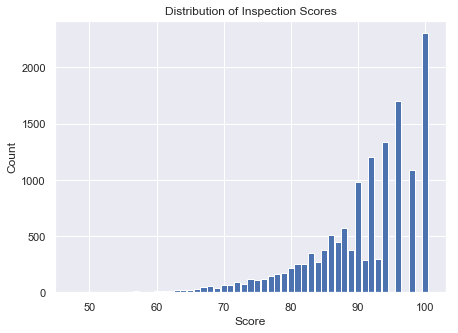

In [102]:
plt.figure(figsize = (7,5))
plt.xlabel('Score')
plt.ylabel('Count')

plt.bar(ins['score'].value_counts(ascending=True).index, ins['score'].value_counts(ascending=True), width= .9)

plt.title('Distribution of Inspection Scores');


The distribution is unimodal with a peak at 100. It is skewed left (as expected with a variable bounded on the right). The distribution has a long left tail with some restaurants receiving scores that are in the 50s, 60s, and 70s. One unusal feature of the distribution is the bumpiness with even numbers having higher counts than odd. This may be because the violations result in penalties of 2, 4, 10, etc. points.



To determine the unusual factors in the distribution of the scores, we can head out to yelp to take a look at the reviews on yelp for some of the restaurants with low scores

In [103]:
name_add = bus[['business_id', 'name', 'address']]

ins_named = pd.merge(ins, name_add, how='left', on ='business_id')
ins_named.head()


,business_id,score,date,type,new_date,year,name,address
0,19,94,20160513,routine,2016-05-13,2016,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
1,19,94,20171211,routine,2017-12-11,2017,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
2,24,98,20171101,routine,2017-11-01,2017,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
3,24,98,20161005,routine,2016-10-05,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
4,24,96,20160311,routine,2016-03-11,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"


In [104]:
ins_named.loc[ins_named['score'] == ins_named['score'].min(), :]

,business_id,score,date,type,new_date,year,name,address
13179,86647,48,20160907,routine,2016-09-07,2016,DA CAFE,407 CLEMENT ST


Yelp review: "'Authentic Hong Kong style chinese restaurant where you can find tasty and cheap food.'"

Looking up the restaurants, it can also be seen that some of them are not restaurants 

Now, take a look at some restaurants to see how many time they are inspected 

In [107]:
a = ins_named.groupby(['business_id'])['score'].describe()
at_least_3 = a[a['count'] >= 3]

mini = at_least_3['min']
maxi = at_least_3['max']
diff = maxi - mini 
at_least_3['diff'] = diff
name_diff = pd.merge(ins_named, at_least_3, how = 'left', on = 'business_id')
swing = name_diff[name_diff['diff'] == diff.max()][['business_id', 'name', 'diff']]

max_swing = swing.iloc[0][1]
max_swing

/Users/thaonguyen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


"JOANIE'S DINER INC."

In [108]:
inspections_by_id_and_year = ins.groupby([ins['business_id'], ins['year']]).size().sort_values(ascending=False).rename("count").to_frame()
inspections_by_id_and_year.head()

,,count
business_id,year,
573,2017,4
1261,2015,4
2749,2016,3
5913,2015,3
86336,2016,3


In [109]:
inspections_by_id_and_year['count'].value_counts()

1    9531
2    2175
3     111
4       2
Name: count, dtype: int64

In [110]:
ins2016 = ins[ins['year'] == 2016]

def to_list(x):
    return list(x)

get_2016 = (ins2016.sort_values('date')).loc[:, ['business_id', 'score']]

pair_2016 = get_2016.groupby('business_id').filter(lambda x: len(x)==2).groupby('business_id')

func = pair_2016.agg(to_list).rename(columns={'score' : 'score_pair'})

scores_pairs_by_business = func

scores_pairs_by_business.head()

,score_pair
business_id,
24,"[96, 98]"
45,"[78, 84]"
66,"[98, 100]"
67,"[87, 94]"
76,"[100, 98]"


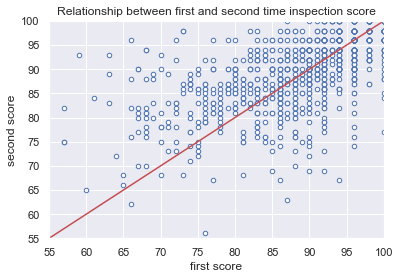

In [113]:
x,y = zip(*scores_pairs_by_business['score_pair'])

plt.plot([55,100],[55,100],'r-')

plt.xlabel('first score')
plt.ylabel('second score')

plt.axis([55,100,55,100]);
plt.title('Relationship between first and second time inspection score')
plt.scatter(x, y ,s=20,facecolors='white',edgecolors='b');

To visuallize better, we can attempt to plot the histogram of the difference between the first and second score 

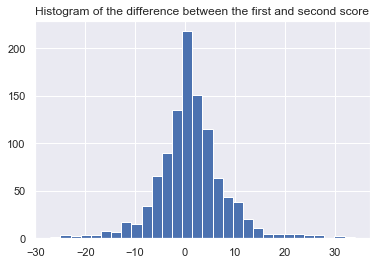

In [116]:
diff_xy = np.array(y) - np.array(x)
plt.title('Histogram of the difference between the first and second score')
plt.hist(diff_xy,bins=30);

Summary    
We found that the records are at the inspection level and that we have inspections for multiple years.   
We also found that many restaurants have more than one inspection a year. 
By joining the business and inspection data, we identified the name of the restaurant with the worst rating and can easily identify the ones with better scores 
We identified the restaurant that had the largest swing in rating over time.
We also examined the relationship between the scores when a restaurant has multiple inspections in a year. Our findings were a bit counterintuitive and may warrant further investigation. 